## The Perceptron Algorithm

In [1]:
from perceptron import Perceptron
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

We are looking at the perceptron algorithm in this post, understanding how it operates and converges, and observing some use cases. The source code for the implementation can be found at https://github.com/davidmbyrne/davidmbyrne.github.io/blob/main/posts/perceptron-blog-post/perceptron.py

#### Looking at Source Code


The perceptron algorithm I wrote has two main methods. First, I wrote a "fit" function which prepares our raw data for use in computation moving forward. The fit function first (say that 5 times fast) initializes an empty history vector, which we use to store the accuracy score of our algorithm after each iteration. We also initialize our weight vector w, and append a column of ones to our feature matrix X, which makes our computation of dot product far easier. The second major method is the perceptron update function, which is responsible for the incremental adjustments to our weight vector. This function operates as follows:  <br>
1) Choose a random point in X <br>
2) Compute the dot product of the given point and the current weight vector w <br>
3) If the dot product is less than 0 update w as follows:  <br>
    - $w^{t+1} = w^t + (2y_i-1) * X_i$
    


#### Experiments

##### Case 1: Linearly Seperable

Our first experiment is a simple 3 dimensional case that is linear seperable.

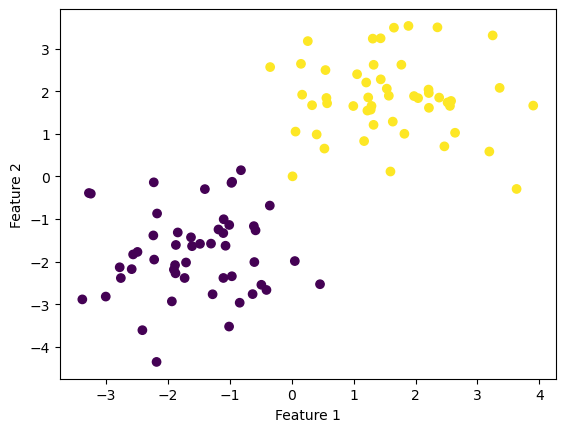

In [2]:
np.random.seed(11)

n = 100
p_features = 3

#Create feature matrix X and vector y
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

#Plot points
fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

We can run our algorithm until convergence, print the resulting score, and plot a line using the resulting weight vector. The process is as follows:
1) Initialize our Perceptron object and fit the model
2) For the specified number of iterations  
    a. Run the predict function, which creates a vector of guesses $\hat{y}$  
    b. Score the current iteration and store the score value in the history vector  
    c. Check if the score is equal to 1 and terminate the loop, otherwise perform the perceptron update step

In [3]:
p = Perceptron() 
max_iter = 1000 #Set max iterations
p.fit(X, y, max_iter) #Fit model
    
print("final score: " + str(p.currscore))

final score: 1.0


In [4]:
#Line drawing function using weight vector w
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

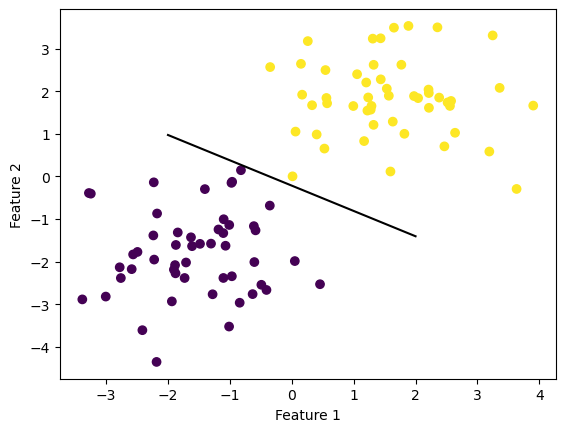

In [5]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
draw_line(p.w_, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

We can also plot the progession of the score of our algorithm for each iteration. In this case we reach a score value of 1.0 before the max iterations

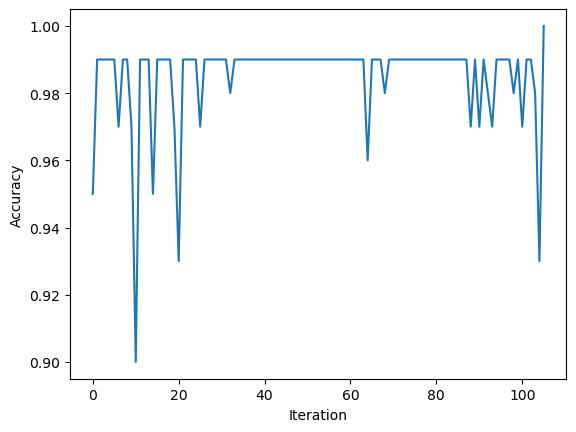

In [6]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

##### Case 2: Not Linearly Seperable

In the case of data which is not linearly seperable, the perceptron algorithm does not converge. Convergence occurs in this case when we reach a perfect score, which is impossible here.
Data such as this looks as follows:

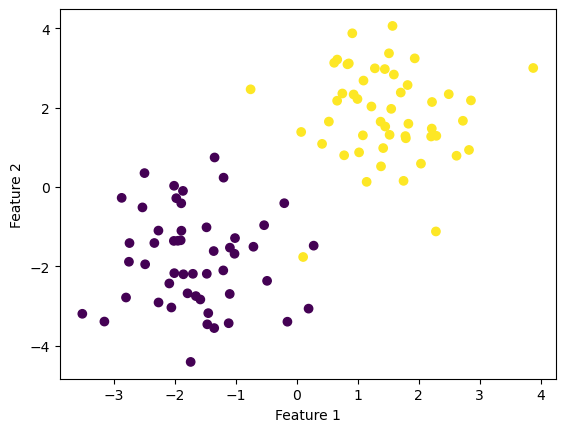

In [7]:
np.random.seed(15)

n = 100
p_features = 3

#Create feature matrix X and vector y
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

#Plot points
fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

We again can run our algorithm and plot our final weight vector as well as the score for each iteration.

In [9]:
p = Perceptron()   
max_iter = 1000 #Set max iterations
p.fit(X, y, max_iter) #Fit model
    
print("final score: " + str(p.currscore))

final score: 0.97


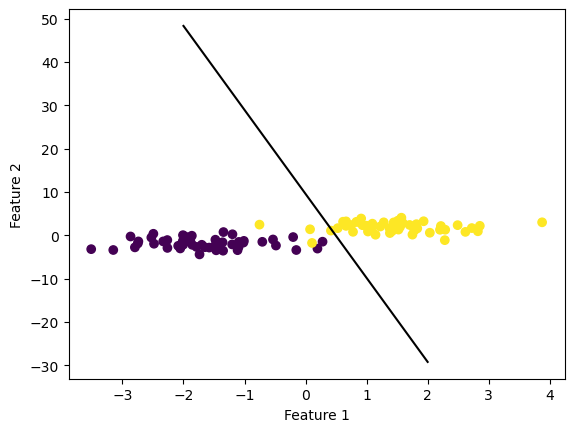

In [10]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
draw_line(p.w_, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In this case, since convergence is impossible, we reach the max number of iterations before converging to a score of 1.0.

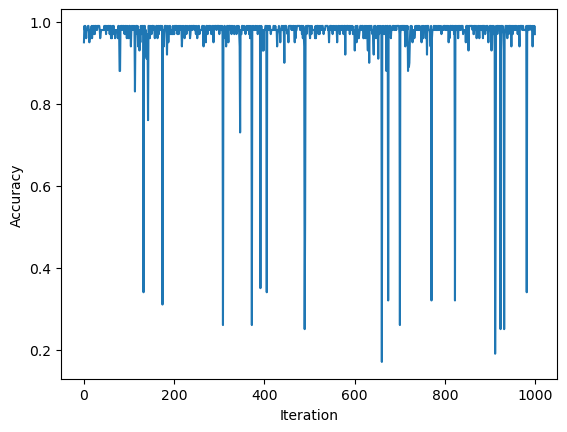

In [11]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

##### Case 3: Higher Dimensional Data

In this case, we increase the number of features from 3 to 5

In [12]:
np.random.seed(21)

n = 100
p_features = 5

#Create feature matrix X and vector y
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7, -1.7, -1.7), (1.7, 1.7, 1.7, 1.7)])

In [15]:
p = Perceptron()   
max_iter = 1000 #Set max iterations
p.fit(X, y, max_iter) #Fit model
    
print("final score: " + str(p.currscore))

final score: 1.0


Despite increasing the number of features, the perceptron algorithm can still converge. The dot product is simply calculated using more features, and the same update rule can be applied. 

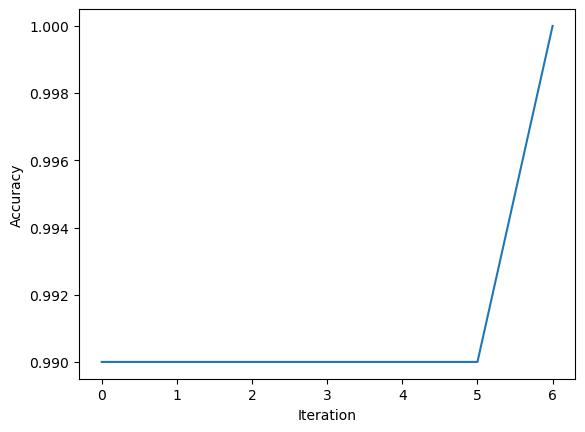

In [16]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

#### Time Complexity
For each iteration of our perceptron update we have to compute a dot product of two vectors, each with length p equal to the amount of features. In computing this dot product, we have to make p multiplications and p-1 additions. If we assume each of these operations to be time constant operations, the time compelxity of one step is 2p-1 or O(p). 